# Improving on the baseline

There are two obvious things we could try to do here (before going out to hunt for more data, of course).

We have obvious overfitting problem, so any technique that helps with regularization should help if we use it judiciously.

Let's try a very common technique: dropout

# Dropout

Dropout is a very counterintuitive technique when you first hear about it, but it really makes a lot of sense after a while. It consists of ignoring the output of some of the units in a layer 

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(72,72),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(72,72),
                                                        batch_size=100,
                                                        class_mode='binary')

Using TensorFlow backend.


Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [2]:
import keras
from keras import backend as K

from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense, Dropout

detector = keras.Sequential()
detector.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
detector.add(MaxPooling2D((2,2)))
detector.add(Conv2D(32, (3, 3), activation='relu'))
detector.add(MaxPooling2D((2,2)))
detector.add(Flatten())
detector.add(Dense(128, activation='relu'))
detector.add(Dropout(.5))
detector.add(Dense(128, activation='relu'))
detector.add(Dropout(.5))
detector.add(Dense(64, activation='relu'))
detector.add(Dropout(.5))
detector.add(Dense(1, activation='sigmoid'))

detector.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [3]:
from keras.optimizers import Adam

detector.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = detector.fit_generator(train_generator,
                                 steps_per_epoch=20,
                                 epochs=50,
                                 validation_data=validation_generator,
                                 validation_steps=20)

Epoch 1/50
20/20 [==============================] - 20s 982ms/step - loss: 0.4827 - acc: 0.7830 - val_loss: 0.3474 - val_acc: 0.8730
Epoch 2/50
20/20 [==============================] - 14s 679ms/step - loss: 0.3704 - acc: 0.8700 - val_loss: 0.3279 - val_acc: 0.8684
Epoch 3/50
20/20 [==============================] - 17s 852ms/step - loss: 0.3273 - acc: 0.8754 - val_loss: 0.2950 - val_acc: 0.8725
Epoch 4/50
20/20 [==============================] - 14s 725ms/step - loss: 0.3085 - acc: 0.8720 - val_loss: 0.2807 - val_acc: 0.8720
Epoch 5/50
20/20 [==============================] - 14s 710ms/step - loss: 0.3048 - acc: 0.8795 - val_loss: 0.2829 - val_acc: 0.8715
Epoch 6/50
20/20 [==============================] - 14s 710ms/step - loss: 0.3215 - acc: 0.8670 - val_loss: 0.2630 - val_acc: 0.8684
Epoch 7/50
20/20 [==============================] - 14s 685ms/step - loss: 0.2832 - acc: 0.8836 - val_loss: 0.3185 - val_acc: 0.8730
Epoch 8/50
20/20 [==============================] - 18s 897ms/step - 

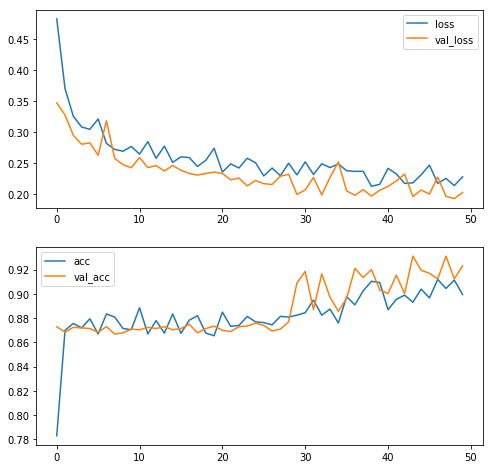

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

OK! so we have prevented overfitting! Let's push a bit more.

In [5]:
from keras.optimizers import Adam

detector.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-4),
                     metrics=['acc'])

history_pt2 = detector.fit_generator(train_generator,
                                     steps_per_epoch=20,
                                     epochs=50,
                                     validation_data=validation_generator,
                                     validation_steps=20)

Epoch 1/50
20/20 [==============================] - 19s 958ms/step - loss: 0.2127 - acc: 0.9045 - val_loss: 0.1935 - val_acc: 0.9281
Epoch 2/50
20/20 [==============================] - 14s 706ms/step - loss: 0.2139 - acc: 0.9064 - val_loss: 0.2074 - val_acc: 0.9256
Epoch 3/50
20/20 [==============================] - 16s 804ms/step - loss: 0.2137 - acc: 0.9116 - val_loss: 0.2410 - val_acc: 0.9170
Epoch 4/50
20/20 [==============================] - 14s 703ms/step - loss: 0.2033 - acc: 0.9190 - val_loss: 0.1986 - val_acc: 0.9271
Epoch 5/50
20/20 [==============================] - 15s 730ms/step - loss: 0.2211 - acc: 0.9055 - val_loss: 0.1842 - val_acc: 0.9297
Epoch 6/50
20/20 [==============================] - 14s 688ms/step - loss: 0.2065 - acc: 0.9125 - val_loss: 0.2015 - val_acc: 0.9256
Epoch 7/50
20/20 [==============================] - 14s 686ms/step - loss: 0.2075 - acc: 0.9119 - val_loss: 0.2010 - val_acc: 0.9256
Epoch 8/50
20/20 [==============================] - 19s 970ms/step - 

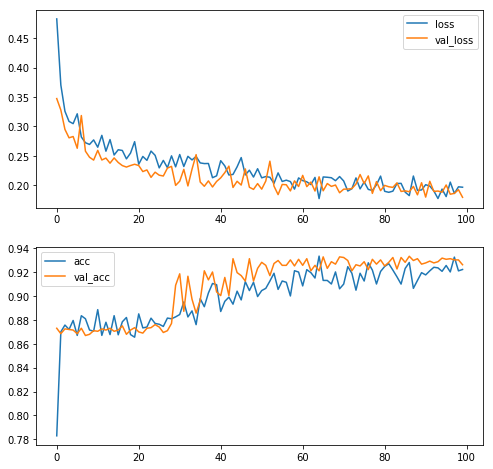

In [6]:
f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)

nb_epochs = len(history.epoch)
concatenated = history.epoch + [nb_epochs + epoch_number for epoch_number in history_pt2.epoch]

axes[0].plot(concatenated, history.history['loss'] + history_pt2.history['loss'], label='loss')
axes[0].plot(concatenated, history.history['val_loss'] + history_pt2.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(concatenated, history.history['acc'] + history_pt2.history['acc'], label='acc')
axes[1].plot(concatenated, history.history['val_acc'] + history_pt2.history['val_acc'], label='val_acc')
axes[1].legend()